In [1]:
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open('beta1_0_1/results_0_0.txt', 'rb') as f:
    test = pickle.load(f)

In [3]:
with open('beta1_0_1/paramgrid_asymmetry.txt', 'rb') as f: 
    param_grid = pickle.load(f)

In [4]:
def mutator_single_mut(genotypes_names, pop_vec):
    p = 0
    for g in range(len(genotypes_names)):
        if (genotypes_names[g][0] == 1 and genotypes_names[g][2] == 0) and genotypes_names[g][1] == 1:
            p += pop_vec[g]
    return(p)

def baseline_single_mut(genotypes_names, pop_vec):
    p = 0
    for g in range(len(genotypes_names)):
        if (genotypes_names[g][0] == 1 and genotypes_names[g][2] == 0) and genotypes_names[g][1] == 0:
            p += pop_vec[g]
    return(p)

def baseline_nomut(genotypes_names, pop_vec):
    p = 0
    for g in range(len(genotypes_names)):
        if (genotypes_names[g][0] == 0 or genotypes_names[g][2] == 0) and genotypes_names[g][1] == 0:
            p += pop_vec[g]
    return(p)

def mutator_nomut(genotypes_names, pop_vec):
    p = 0
    for g in range(len(genotypes_names)):
        if (genotypes_names[g][0] == 0 or genotypes_names[g][2] == 0) and genotypes_names[g][1] == 1:
            p += pop_vec[g]
    return(p)

def pS_proportion(genotypes_names, pop_vec):
    return(mutator_single_mut(genotypes_names, pop_vec) + baseline_single_mut(genotypes_names, pop_vec))

def pM_proportion(genotypes_names, pop_vec):
    return(mutator_single_mut(genotypes_names, pop_vec) + mutator_nomut(genotypes_names, pop_vec))

def pR_proportion(genotypes_names, pop_vec):
    return(baseline_single_mut(genotypes_names, pop_vec)/baseline_nomut(genotypes_names, pop_vec))

def association(genotypes_names, pop_vec):
    return(mutator_single_mut(genotypes_names, pop_vec)/pS_proportion(genotypes_names, pop_vec))

In [7]:
genotype_names_3 = []
for i in range(3):
    for j in range(2):
        for k in range(5):
            genotype_names_3.append((i,j,k))
            
def convert_logspace(val, true_axis, range_axis):
    possibilities = np.logspace(np.log10(true_axis[0]),np.log10(true_axis[-1]), 10000)
    closest_possibility = np.searchsorted(possibilities, val)
    converted_value = ((closest_possibility - 0) / (10000-0))*len(range_axis)
    return(converted_value)

In [8]:
noise_labels = ['$10^{-6}$','$10^{-5}$','$10^{-4}$','$10^{-3}$','$10^{-2}$','$10^{-1}$','0.95']
switching_rates = np.logspace(-6, np.log10(0.95),100)
range_axis = np.arange(99)
which_ticks = [convert_logspace(val, switching_rates, range_axis) for val in [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.95]]

In [9]:
noise_levels = np.logspace(-6, np.log10(0.95), 100)

In [10]:
param_grid[param]

NameError: name 'param' is not defined

In [11]:
param = 8

In [12]:
beta1_matrix = np.zeros((100,100))

for i in range(100):
    
    with open('beta1_0_1/results_'+str(param)+'_'+str(i)+'.txt', 'rb') as f:
        
        res = pickle.load(f)
        
    for j in range(100):
        
        m1 = baseline_single_mut(genotype_names_3, res[j])
        M1 = mutator_single_mut(genotype_names_3, res[j])
        
        beta1_matrix[99-i, j] = param_grid[param]['mu'] * m1 + param_grid[param]['tau']*param_grid[param]['mu'] * M1
        
        
beta1M_matrix = np.zeros((100,100))

for i in range(100):
    
    with open('beta1M_0_1/results_'+str(param)+'_'+str(i)+'.txt', 'rb') as f:
        
        res = pickle.load(f)
        
    for j in range(100):
        
        m1 = baseline_single_mut(genotype_names_3, res[j])
        M1 = mutator_single_mut(genotype_names_3, res[j])
        
        beta1M_matrix[99-i, j] = param_grid[param]['mu'] * m1 + param_grid[param]['tau']*param_grid[param]['mu'] * M1

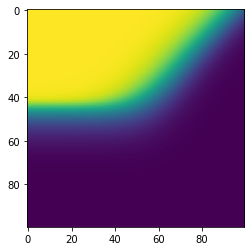

In [11]:
plt.imshow(beta1_matrix)

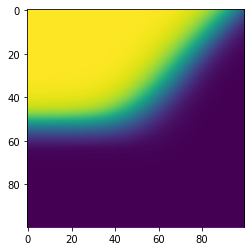

In [12]:
plt.imshow(beta1M_matrix)

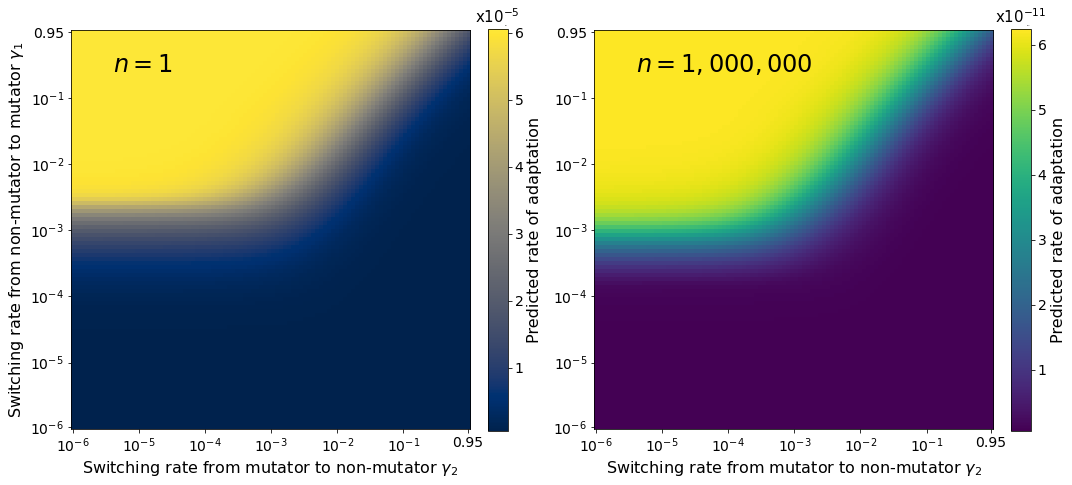

In [14]:
fig, ax = plt.subplots(1,2,figsize = (15,7.5))

im1 = ax[0].imshow(beta1_matrix, cmap = 'cividis')
im2 = ax[1].imshow(beta1M_matrix, cmap = 'viridis')

for i in range(2):
    ax[0].set_ylabel('Switching rate from non-mutator to mutator $\gamma_1$', fontsize = 16)
    ax[i].set_xlabel('Switching rate from mutator to non-mutator $\gamma_2$', fontsize = 16)

    ax[i].set_xticks(which_ticks)
    ax[i].set_xticklabels(noise_labels, fontsize = 14)
    ax[i].set_yticks(which_ticks)
    ax[i].set_yticklabels(noise_labels[::-1], fontsize = 14)
    
ax[0].text(10,10, '$n = 1$', fontsize = 24)
ax[1].text(10,10, '$n = 1,000,000$', fontsize = 24)

cbar1 = plt.colorbar(im1, ax = ax[0], fraction=0.046, pad=0.04)
cbar2 = plt.colorbar(im2, ax = ax[1], fraction=0.046, pad=0.04)

cbar1.ax.yaxis.offsetText.set(size=0)
cbar1.ax.set_title('x$10^{-5}$', fontsize = 15)

cbar2.ax.yaxis.offsetText.set(size=0)
cbar2.ax.set_title('x$10^{-11}$', fontsize = 15)

for cbar in [cbar1, cbar2]:
    cbar.ax.tick_params(labelsize=14)
    cbar.set_label('Predicted rate of adaptation', fontsize = 16)
    cbar.ax.yaxis.offsetText.set(size=0)
    cbar.formatter.set_powerlimits((0, 0))

plt.tight_layout()
plt.savefig('beta_sensitivity_analysis_JAN20.jpg', dpi = 600, bbox_inches = 'tight')

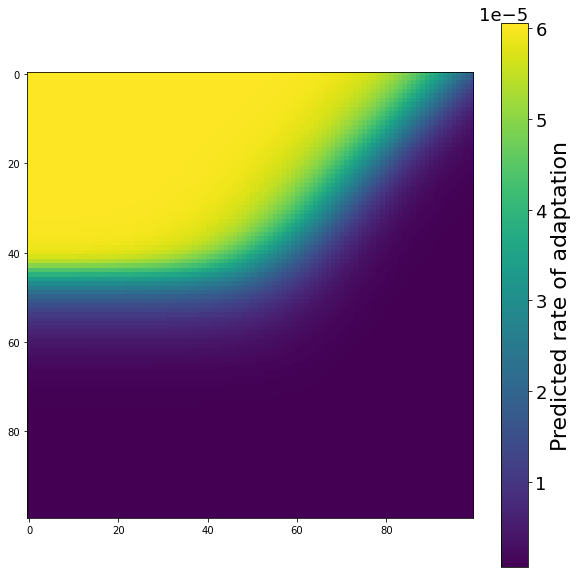

In [14]:
fig, ax = plt.subplots(1,1,figsize = (10,10))

im = ax.imshow(beta1_matrix)

cbar = plt.colorbar(im)

cbar.ax.tick_params(labelsize=18)
cbar.set_label('Predicted rate of adaptation', fontsize = 22)
cbar.ax.yaxis.offsetText.set(size=18)
cbar.formatter.set_powerlimits((0, 0))

plt.savefig('colorbar_matrix.jpg', dpi = 600, bbox_inches = 'tight')

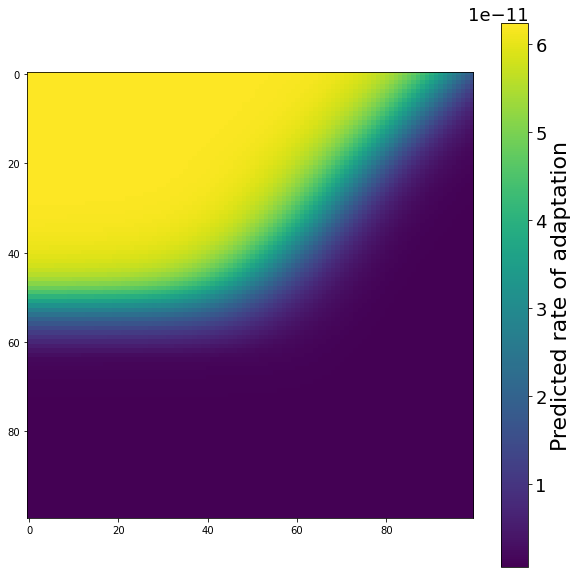

In [15]:
fig, ax = plt.subplots(1,1,figsize = (10,10))

im = ax.imshow(beta1M_matrix)

cbar = plt.colorbar(im)

cbar.ax.tick_params(labelsize=18)
cbar.set_label('Predicted rate of adaptation', fontsize = 22)
cbar.ax.yaxis.offsetText.set(size=18)
cbar.formatter.set_powerlimits((0, 0))
